Classifying Pulsar Stars

In [78]:
set.seed(2001)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(ggplot2)

Preliminary exploratory data analysis
1. Demonstrate that the dataset can be read from the web into R 

In [46]:
#reading the pulsar dataset directly from web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
download.file(url,temp)
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"))
unlink(temp)

pulsar_data

Parsed with column specification:
cols(
  `140.5625` = col_double(),
  `55.68378214` = col_double(),
  `-0.234571412` = col_double(),
  `-0.699648398` = col_double(),
  `3.199832776` = col_double(),
  `19.11042633` = col_double(),
  `7.975531794` = col_double(),
  `74.24222492` = col_double(),
  `0` = col_double()
)



140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


2. Clean and wrangle your data into a tidy format

In [47]:
#added column names & tidied data
colnames(pulsar_data) <- c("mean_pf", "std_pf", "kurt_pf", "skew_pf", "mean_dm", "std_dm", "kurt_dm", "skew_dm", "class")

pulsar_unscaled <- pulsar_data %>%
                mutate(class = as_factor(class))
pulsar_unscaled

mean_pf,std_pf,kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


By looking at the table above, we can see that our target variable, class, has a max value of 1 (real pulsar star), and a min value of 0 (negative, non-pulsar). This indicates that there is a way larger proportion of negative observations than actual stars. Furthermore, the data above requires scaling and balancing as the differences between values may impact our model.

3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [116]:
#summary of data (including means of variables)
summary(pulsar_unscaled)

#checking for missing values
table(is.na(pulsar_unscaled))

    mean_pf            std_pf         kurt_pf            skew_pf       
 Min.   :  5.812   Min.   :24.77   Min.   :-1.87601   Min.   :-1.7919  
 1st Qu.:100.930   1st Qu.:42.38   1st Qu.: 0.02711   1st Qu.:-0.1885  
 Median :115.078   Median :46.95   Median : 0.22324   Median : 0.1987  
 Mean   :111.078   Mean   :46.55   Mean   : 0.47790   Mean   : 1.7704  
 3rd Qu.:127.086   3rd Qu.:51.02   3rd Qu.: 0.47335   3rd Qu.: 0.9282  
 Max.   :192.617   Max.   :98.78   Max.   : 8.06952   Max.   :68.1016  
    mean_dm             std_dm          kurt_dm          skew_dm        
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.977  
 1st Qu.:  1.9231   1st Qu.: 14.44   1st Qu.: 5.781   1st Qu.:  34.957  
 Median :  2.8018   Median : 18.46   Median : 8.434   Median :  83.069  
 Mean   : 12.6149   Mean   : 26.33   Mean   : 8.304   Mean   : 104.859  
 3rd Qu.:  5.4649   3rd Qu.: 28.43   3rd Qu.:10.703   3rd Qu.: 139.311  
 Max.   :223.3921   Max.   :110.64   Max.   :34.540   Max.


 FALSE 
161073 

In [49]:
# creating training and test sets
pulsar_split <- initial_split(pulsar_unscaled, prop = 0.75, strata = class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

# checking if data corresponds to a train / test split of 75% / 25%, as desired
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 9
$ mean_pf <dbl> 103.01562, 136.75000, 88.72656, 119.48438, 130.38281, 107.250…
$ std_pf  <dbl> 39.34165, 57.17845, 40.67223, 48.76506, 39.84406, 52.62708, 3…
$ kurt_pf <dbl> 0.32332837, -0.06841464, 0.60086608, 0.03146022, -0.15832276,…
$ skew_pf <dbl> 1.05116443, -0.63623837, 1.12349169, -0.11216757, 0.38954045,…
$ mean_dm <dbl> 3.1212375, 3.6429766, 1.1789298, 0.9991639, 1.2207358, 2.3319…
$ std_dm  <dbl> 21.744669, 20.959280, 11.468720, 9.279612, 14.378941, 14.4868…
$ kurt_dm <dbl> 7.735822, 6.896499, 14.269573, 19.206230, 13.539456, 9.001004…
$ skew_dm <dbl> 63.17191, 53.59366, 252.56731, 479.75657, 198.23646, 107.9725…
$ class   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 4,474
Columns: 9
$ mean_pf <dbl> 102.50781, 93.57031, 114.36719, 100.85156, 136.09375, 99.3671…
$ std_pf  <dbl> 58.88243, 46.69811, 51.94572, 51.74352, 51.69100, 41.57220, 4…
$ kurt_pf <dbl> 0.465318154, 0.531904850, -0.094498904, 0.393836792, -0.04590…
$ ske

13423 rows in the training data corresponds to exactly 75% of our original data, while 4474 rows in the test data corresponds to 25% of our original data.

In [50]:
# number & percentage of pulsar and non-pulsar observations
# to check if proportion of initial class data was preserved when splitting
original_proportions <- pulsar_unscaled %>%
                        group_by(class) %>%
                        summarize(n = n()) %>%
                        mutate(percent = 100*n/nrow(pulsar_unscaled))
original_proportions

training_proportions <- pulsar_train %>%
                      group_by(class) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))

training_proportions

`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,16258,90.842041
1,1639,9.157959


`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,12187,90.791924
1,1236,9.208076


90.80% of our training data is negative and 9.2% is positive, indicating that our class proportions were roughly preserved when we split the data.

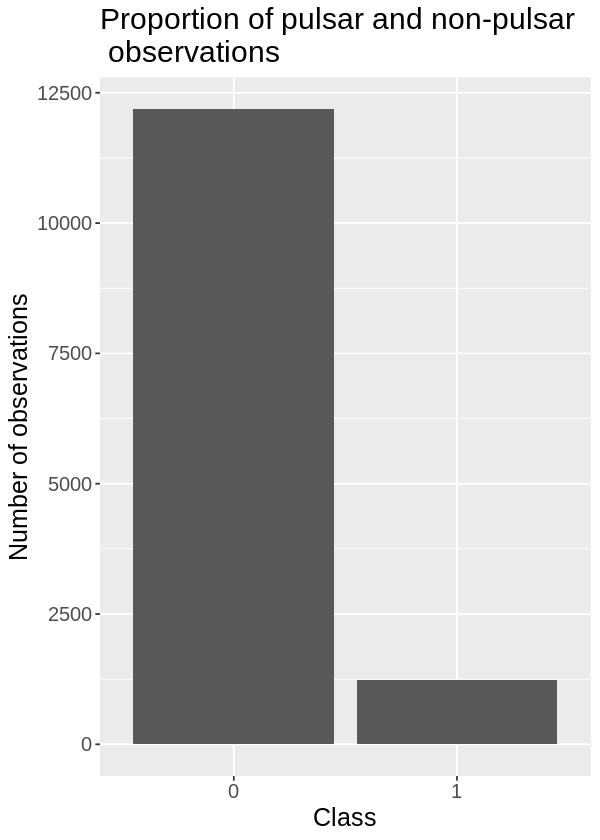

In [51]:
# proportion of pulsar and non-pulsar observations
options(repr.plot.width = 5, repr.plot.height = 7)
pulsar_plot <- ggplot(training_proportions, aes(x = class, y = n)) +
                geom_bar(stat = "identity") +
                labs(x = "Class", y = "Number of observations") +
                theme(text = element_text(size = 15)) +
                ggtitle("Proportion of pulsar and non-pulsar \n observations")

pulsar_plot

90.80% of our training data is negative and 9.2% is positive, indicating that our class proportions were roughly preserved when we split the data.

In [105]:
dist1 <- ggplot(pulsar_train, aes(x = mean_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 111.078, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Mean of integrated profile", y = "Measurements") 

dist2 <- ggplot(pulsar_train, aes(x = std_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 46.55, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Standard deviation of the integrated profile", y = "Measurements") 

dist3 <- ggplot(pulsar_train, aes(x = kurt_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 0.47790, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Excess kurtosis of the integrated profile", y = "Measurements") 

dist4 <- ggplot(pulsar_train, aes(x = skew_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 1.7704, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Skewness of the integrated profile", y = "Measurements") 

dist5 <- ggplot(pulsar_train, aes(x = mean_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 12.6149, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Mean of the DM-SNR curve", y = "Measurements") 

dist6 <- ggplot(pulsar_train, aes(x = std_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 26.33, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Standard deviation of the DM-SNR curve", y = "Measurements")

dist7 <- ggplot(pulsar_train, aes(x = kurt_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 8.304, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Excess kurtosis of the DM-SNR curve", y = "Measurements")

dist8 <- ggplot(pulsar_train, aes(x = skew_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 104.859, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Skewness of the DM-SNR curve", y = "Measurements")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



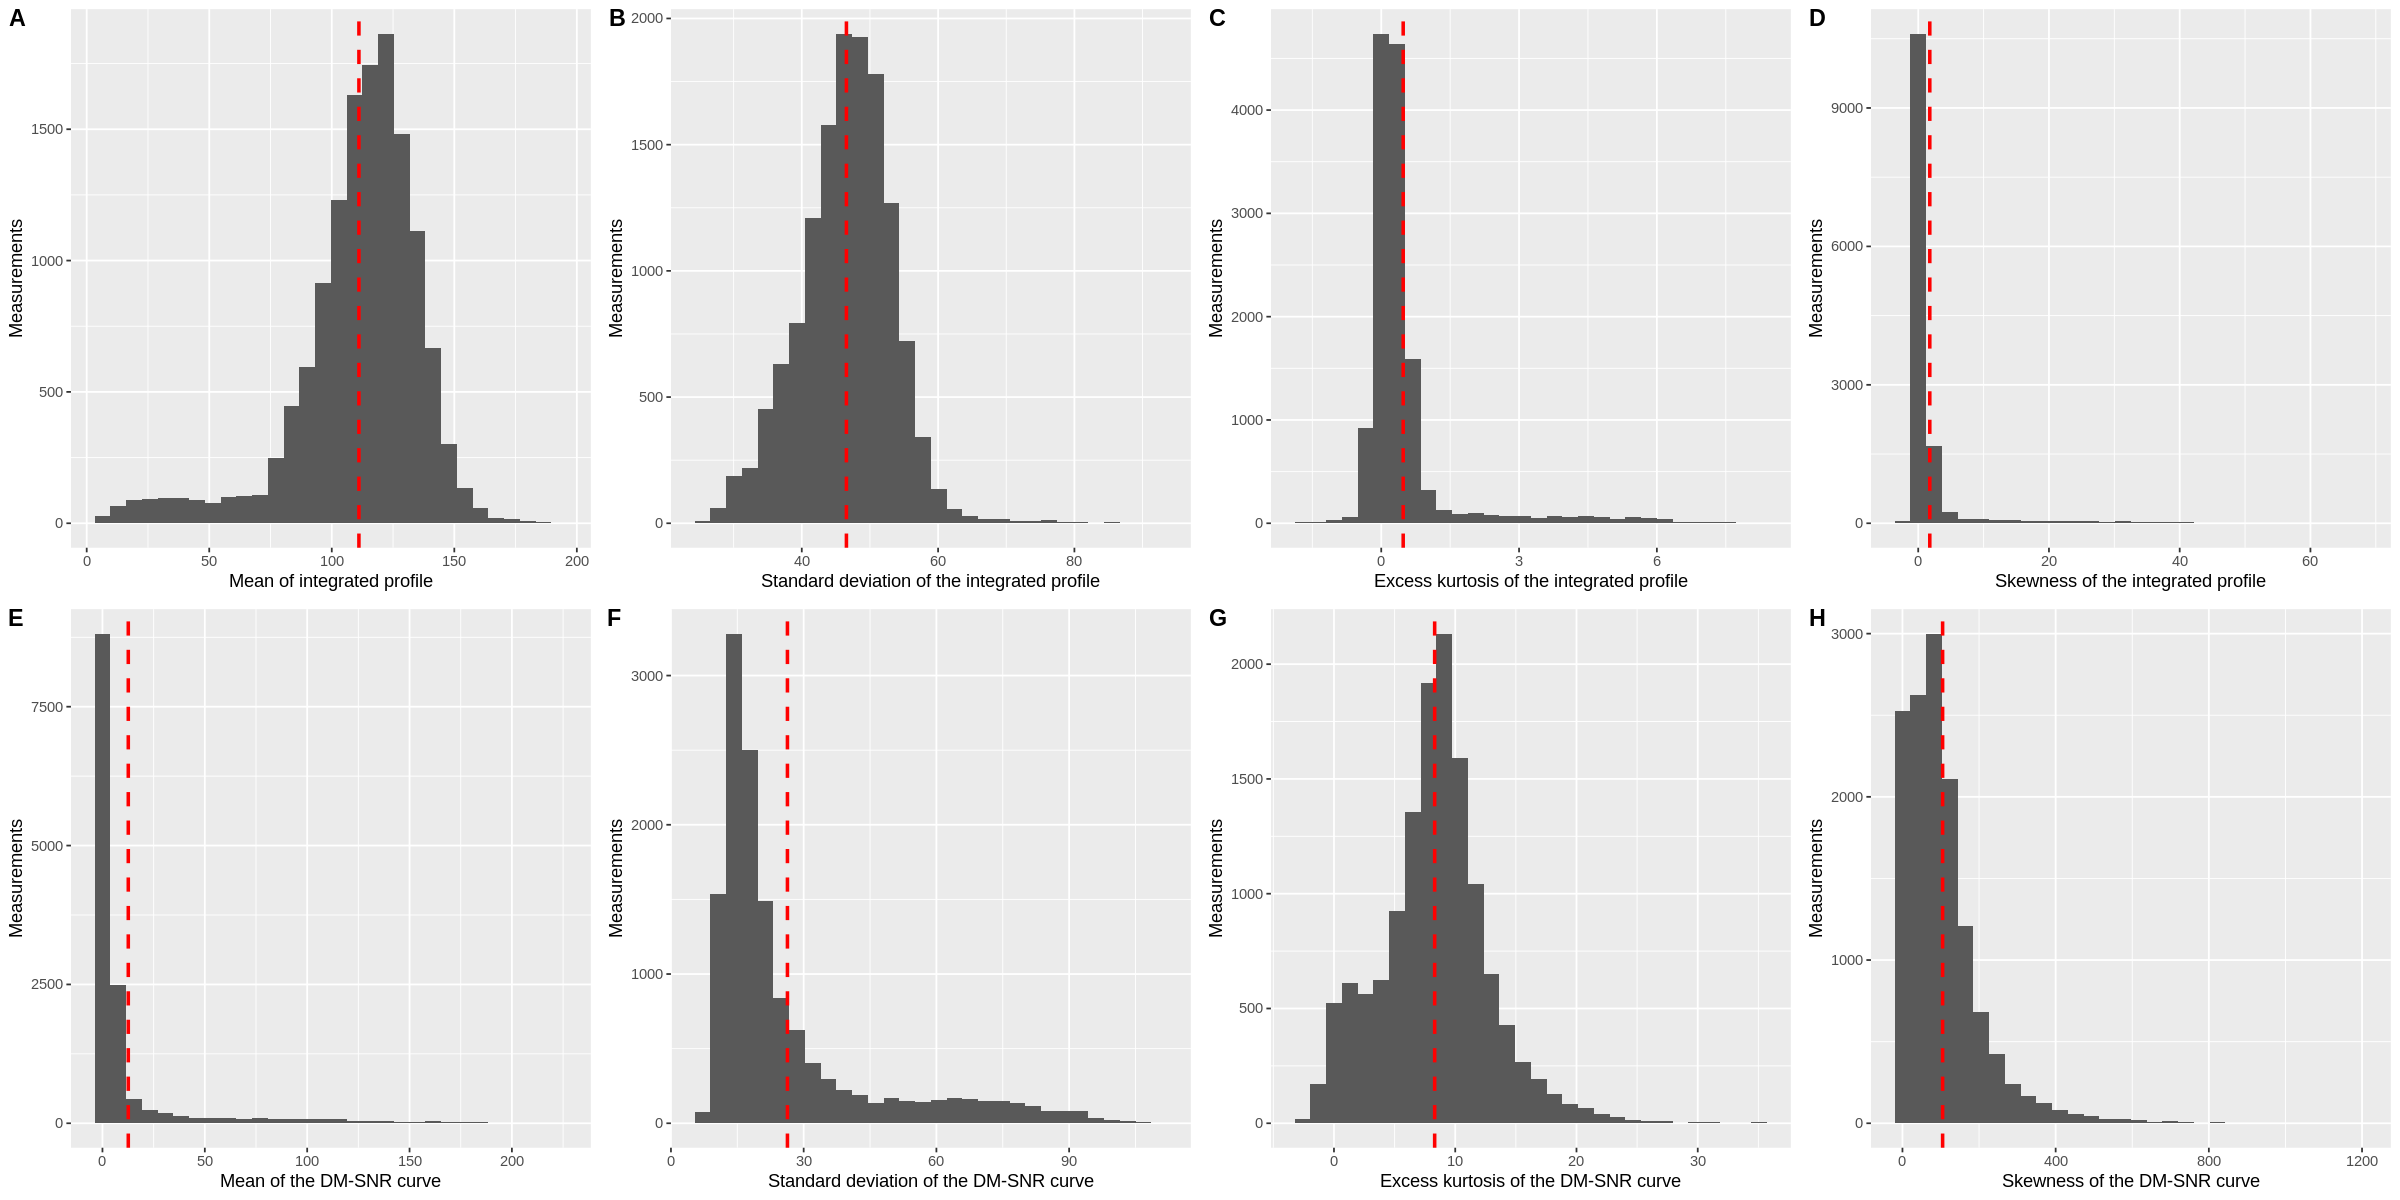

In [114]:
# distributions of each of the variables
options(repr.plot.width = 20, repr.plot.height = 10) 
plot_grid(dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8, labels = "AUTO", ncol = 4)

In [66]:
plot1 <- ggplot(pulsar_unscaled, aes(x = kurt_pf, y = skew_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Excess kurtosis of the integrated profile", y = "Skewness of the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("kurt_pf vs skew_dm")

plot2 <- ggplot(pulsar_unscaled, aes(x = kurt_pf, y = skew_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Excess kurtosis of the integrated profile", y = "Skewness of the integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("kurt_pf vs skew_pf")

plot3 <- ggplot(pulsar_unscaled, aes(x = kurt_pf, y = mean_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Excess kurtosis of the integrated profile", y = "Mean of the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("kurt_pf vs mean_dm")

plot4 <- ggplot(pulsar_unscaled, aes(x = mean_dm, y = skew_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the DM-SNR curve", y = "Skewness of the integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("mean_dm vs skew_pf")

plot5 <- ggplot(pulsar_unscaled, aes(x = skew_dm,, y = skew_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Skewness of the DM-SNR curve", y = "Skewness of the integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("skew_dm vs skew_p")

plot6 <- ggplot(pulsar_unscaled, aes(x = mean_dm,, y = skew_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the DM-SNR curve", y = "Skewness of the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("mean_dm vs skew_dm")


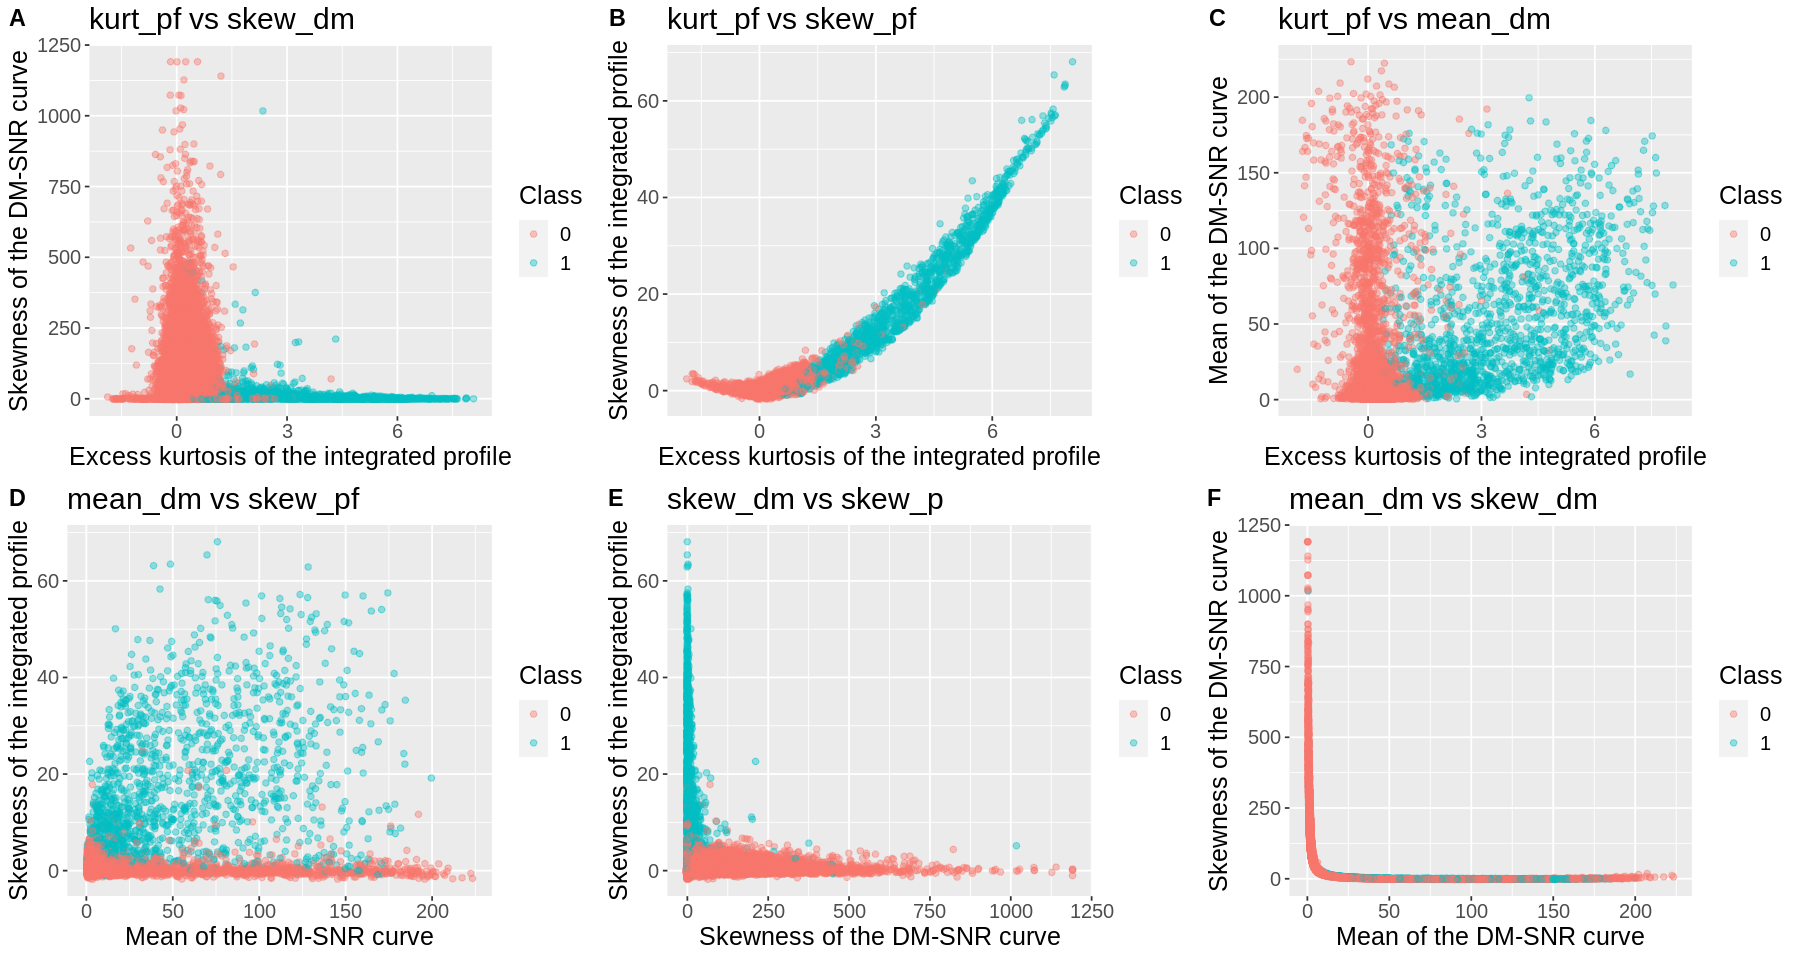

In [115]:
# relationship between our predictor variables
options(repr.plot.width = 15, repr.plot.height = 8) 
plot_grid(plot1, plot2, plot3, plot4, plot5, plot6, labels = "AUTO")